# Things to add to the Project:

1. Word Clouds
2. Top reviewers scores for albums
3. Top reviewers scores by genre & differences

In [169]:
import numpy as np # linear algebra
import pandas as pd # data processing, CSV file I/O (e.g. pd.read_csv)
import matplotlib.pyplot as plt # for plotting

In [170]:
# Download the dataset from Kaggle at https://www.kaggle.com/bcyphers/pitchfork-reviews/download
# Extract the zip and retrieve "reviews.csv"

In [171]:
raw_data = pd.read_csv("C:/Users/Home/Downloads/reviews.csv/reviews.csv")
raw_data.head(3)

,reviewid,Unnamed: 0,title,url,score,best_new_music,author,author_type,pub_date,pub_weekday,pub_day,pub_month,pub_year,reviewid.1,content,genre,label,artist
0,22703,0,mezzanine,http://pitchfork.com/reviews/albums/22703-mezz...,9.3,0,nate patrin,contributor,2017-01-08,6,8,1,2017,22703,"“Trip-hop” eventually became a ’90s punchline,...",electronic,virgin,massive attack
1,22721,1,prelapsarian,http://pitchfork.com/reviews/albums/22721-prel...,7.9,0,zoe camp,contributor,2017-01-07,5,7,1,2017,22721,"Eight years, five albums, and two EPs in, the ...",metal,hathenter,krallice
2,22659,2,all of them naturals,http://pitchfork.com/reviews/albums/22659-all-...,7.3,0,david glickman,contributor,2017-01-07,5,7,1,2017,22659,Minneapolis’ Uranium Club seem to revel in bei...,rock,static shock,uranium club


In [172]:
# Drop columns we won't be needing
raw_data.drop(['url', 'pub_weekday', 'pub_day', 'pub_month',  'reviewid.1', 'Unnamed: 0'], axis = 1, inplace = True)
raw_data.head(3)

,reviewid,title,score,best_new_music,author,author_type,pub_date,pub_year,content,genre,label,artist
0,22703,mezzanine,9.3,0,nate patrin,contributor,2017-01-08,2017,"“Trip-hop” eventually became a ’90s punchline,...",electronic,virgin,massive attack
1,22721,prelapsarian,7.9,0,zoe camp,contributor,2017-01-07,2017,"Eight years, five albums, and two EPs in, the ...",metal,hathenter,krallice
2,22659,all of them naturals,7.3,0,david glickman,contributor,2017-01-07,2017,Minneapolis’ Uranium Club seem to revel in bei...,rock,static shock,uranium club


In [173]:
# Check the datatypes of the dataset
# raw_data['author'] = raw_data['author'].astype(str)
raw_data.dtypes

reviewid            int64
title              object
score             float64
best_new_music      int64
author             object
author_type        object
pub_date           object
pub_year            int64
content            object
genre              object
label              object
artist             object
dtype: object

In [174]:
# Check for null values in the dataset
print(pd.isnull(raw_data).sum())

# fill in the null values for the genre column
raw_data['genre'].fillna("No Genre", inplace = True)

reviewid             0
title                2
score                0
best_new_music       0
author               0
author_type       3904
pub_date             0
pub_year             0
content             10
genre             2364
label               47
artist               2
dtype: int64


### Change the score of albums to whole numbers

In [175]:
# Change the score number to a whole number ranging from 1 - 100
increase_score = raw_data['score'] * 10

In [176]:
raw_data['score'] = increase_score
raw_data['score'] = raw_data['score'].astype(int)
raw_data.head(3)

,reviewid,title,score,best_new_music,author,author_type,pub_date,pub_year,content,genre,label,artist
0,22703,mezzanine,93,0,nate patrin,contributor,2017-01-08,2017,"“Trip-hop” eventually became a ’90s punchline,...",electronic,virgin,massive attack
1,22721,prelapsarian,79,0,zoe camp,contributor,2017-01-07,2017,"Eight years, five albums, and two EPs in, the ...",metal,hathenter,krallice
2,22659,all of them naturals,73,0,david glickman,contributor,2017-01-07,2017,Minneapolis’ Uranium Club seem to revel in bei...,rock,static shock,uranium club


### Create two dataframes based on if an author has less than 100 reviews/more than or equal to 100 reviews

In [177]:
strings = raw_data['author'].value_counts()[:52].index # 52 authors over 100 reviews or more

# Create a list containing the authors with >= 100 reviews
author_names = []
for x in strings:
    author_names.append(x)

In [178]:
raw_data['author'].value_counts(normalize = True)[:52].sum() # percentage of all reviews

0.6833260822275397

In [179]:
(raw_data['author'].value_counts() >= 100).sum() # proves how many authors have over 100 reviews or more

52

In [180]:
author_less = []
strings = raw_data['author'].value_counts()[52:].index
for x in strings:
    author_less.append(x)

In [181]:
# get the indices of the authors with >= 100 reviews, needed for data cleaning
keep_indices = []
increment = -1
for i in raw_data['author']: # iterate through the author column of the dataframe
    increment += 1 # increase when the iteration for the row has been complete to check if the author is in the list
    for j in range(len(author_names)): # iterate through the names with >= 100 reviews
        if i == author_names[j]: # check if they are the same
           keep_indices.append(increment) # append the indice

In [182]:
# compare if the amonut of reviews is the same as the authors total reviews with >= 100 
print(len(keep_indices))
print(raw_data['author'].value_counts()[:52].sum())

12565
12565


In [183]:
# get the indices we want to drop
remove_indices = []
increment = -1
for i in raw_data['author']:
    increment += 1
    for j in range(len(author_less)):
        if i == author_less[j]:
            remove_indices.append(increment)

In [184]:
# compare if the amonut of reviews is the same as the authors total reviews with >= 100 
print(len(remove_indices))
print(raw_data['author'].value_counts()[52:].sum())

5823
5823


In [185]:
subdata = raw_data.drop(remove_indices)
subdata['author'].value_counts() # check if the <= 100 reviews have been removed

joe tangari             815
stephen m. deusner      725
ian cohen               699
brian howe              500
mark richardson         476
stuart berman           445
marc hogan              439
nate patrin             347
marc masters            312
jayson greene           299
grayson currin          289
brandon stosuy          287
matthew murphy          274
dominique leone         273
jess harvell            273
andrew gaerig           270
jason crock             267
rob mitchum             267
andy beta               249
paul thompson           222
joshua klein            217
larry fitzmaurice       217
chris dahlen            214
nick neyland            211
philip sherburne        209
adam moerder            209
tom breihan             208
amanda petrusich        200
matt lemay              196
ryan dombal             174
mike powell             160
david raposa            155
zach kelly              153
sam ubl                 152
nitsuh abebe            144
grayson haver currin

In [186]:
# created dataframe with authors < 100 reviews
less100data = raw_data.drop(keep_indices)
less100data['author'].value_counts()

aaron leitko                                                   97
brent dicrescenzo                                              93
zach baron                                                     89
tim finney                                                     86
ryan schreiber                                                 85
rebecca raber                                                  84
jonah bromwich                                                 81
david bevan                                                    80
matthew perpetua                                               70
brad haywood                                                   69
zoe camp                                                       69
andy o'connor                                                  67
david drake                                                    66
jason nickey                                                   65
cory d. byrom                                                  63
kim kelly 

### Amount of reviews for authors with over 100

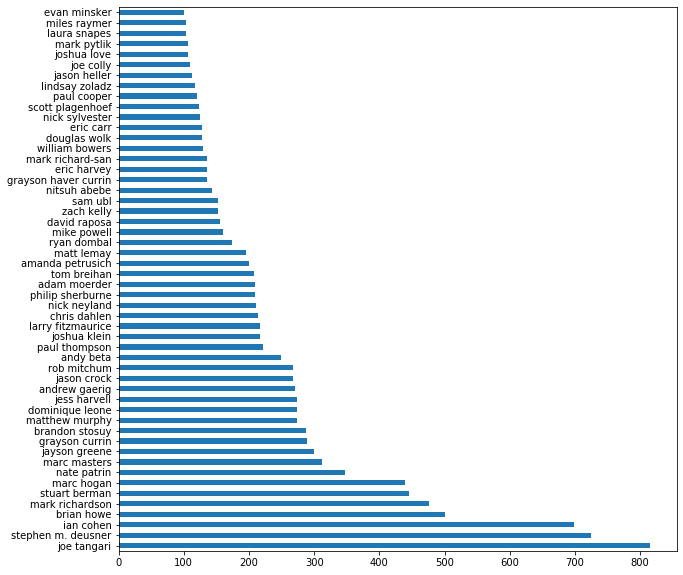

In [187]:
plt.figure(figsize = (10,10))
subdata['author'].value_counts().plot(kind='barh')

### Differentiation of Top 52 vs All vs Under 52 authors 

In [188]:
total = raw_data['genre'].value_counts(ascending = True)
authors100 = subdata['genre'].value_counts(ascending = True)
less100 = less100data['genre'].value_counts(ascending = True)

(array([0, 1, 2, 3, 4, 5, 6, 7, 8, 9]), <a list of 10 Text xticklabel objects>)

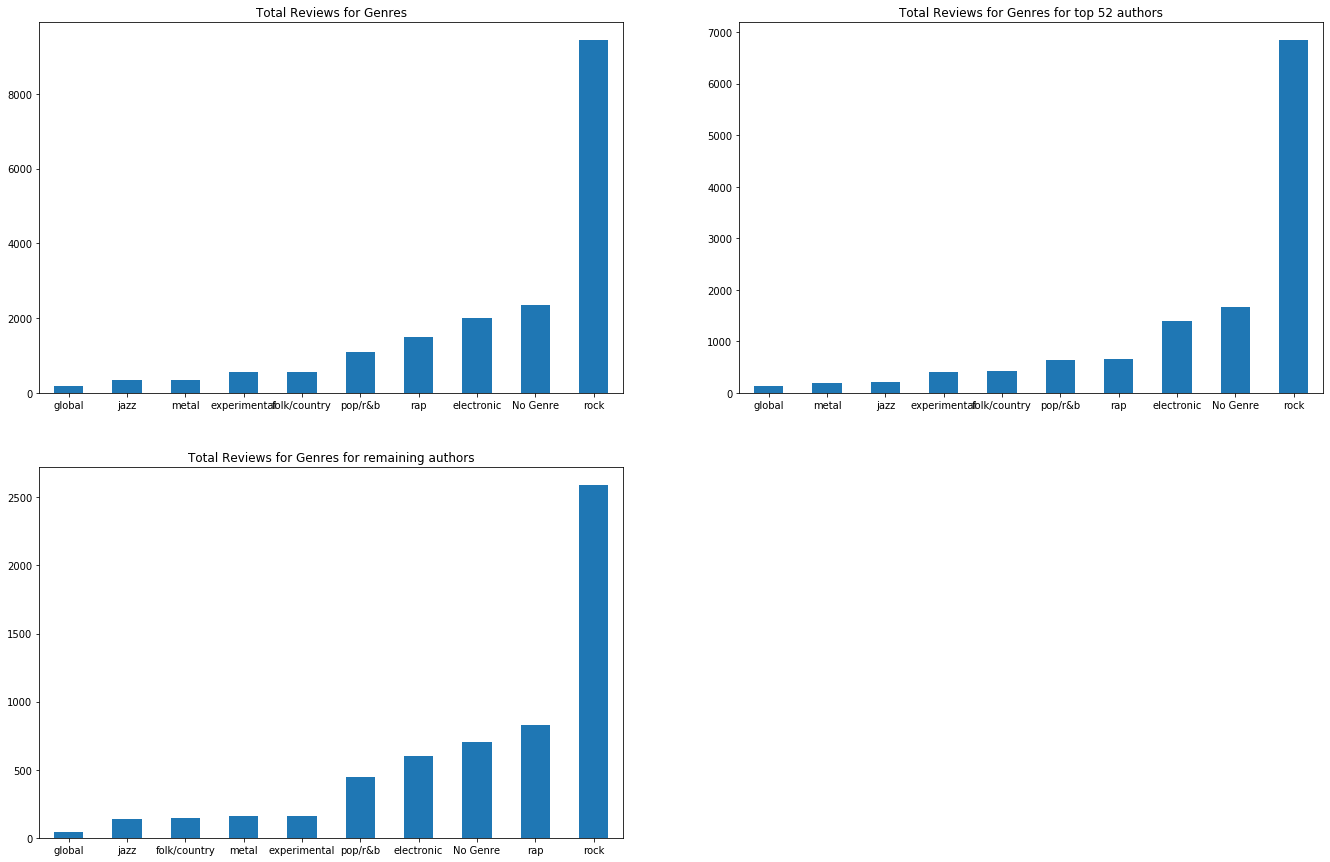

In [189]:
fig = plt.figure(figsize = (23, 15), edgecolor = 'Red')


ax1 = fig.add_subplot(2, 2, 1)
total.plot(ax = ax1, kind = 'bar', title = 'Total Reviews for Genres')
plt.xticks(rotation = 'horizontal')

ax2 = fig.add_subplot(2, 2, 2)
authors100.plot(ax = ax2, kind = 'bar', title = 'Total Reviews for Genres for top 52 authors')
plt.xticks(rotation = 'horizontal')

ax3 = fig.add_subplot(2, 2, 3)
less100.plot(ax = ax3, kind = 'bar', title = 'Total Reviews for Genres for remaining authors')
plt.xticks(rotation = 'horizontal')

In [190]:
# Solution to separating the genres for authors with >= 100 reviews for Pitchfork
rap_data = subdata[subdata['genre'] == 'rap']
electronic_data = subdata[subdata['genre'] == 'electronic']
pop_and_rb_data = subdata[subdata['genre'] == 'pop/r&b']
experimental_data = subdata[subdata['genre'] == 'experimental']
metal_data = subdata[subdata['genre'] == 'metal']
global_data = subdata[subdata['genre'] == 'global']
rock_data = subdata[subdata['genre'] == 'rock']
folk_and_country_data = subdata[subdata['genre'] == 'folk/country']
jazz_data = subdata[subdata['genre'] == 'jazz']

In [191]:
# Another Solution to separating the genres, but takes longer to do compared to the first solution
electronic = (subdata['genre'] == 'electronic')
electronic_data = subdata[electronic]
electronic_data.head(3)

,reviewid,title,score,best_new_music,author,author_type,pub_date,pub_year,content,genre,label,artist
0,22703,mezzanine,93,0,nate patrin,contributor,2017-01-08,2017,"“Trip-hop” eventually became a ’90s punchline,...",electronic,virgin,massive attack
7,22694,tehillim,70,0,andy beta,contributor,2017-01-05,2017,"For the last thirty years, Israel’s electronic...",electronic,stroboscopic artefacts,yotam avni
24,22713,the wasp factory,73,0,brian howe,contributor,2016-12-27,2016,How do you stage an opera that mostly takes pl...,electronic,bedroom community,ben frost


## Create new dataframe: Find the total score, total albums, average score, genre of all artists

In [192]:
artist_data = pd.DataFrame(columns = ['Artist', 'Total Score', 'Total Albums', 'Average Score', 'Genre'])
artist_data

,Artist,Total Score,Total Albums,Average Score,Genre


In [193]:
# Grab the artist names first 
artist_names = []
for i in raw_data['artist'].index:
    name = raw_data.loc[i, 'artist']
    
    if name in artist_names:
        continue;
    else:
        artist_names.append(name)

In [194]:
artist_data['Artist'] = artist_names
artist_data.head(3)

,Artist,Total Score,Total Albums,Average Score,Genre
0,massive attack,NaN,NaN,NaN,NaN
1,krallice,NaN,NaN,NaN,NaN
2,uranium club,NaN,NaN,NaN,NaN


In [195]:
scores = []
total_albums = []
for i in artist_data['Artist']:
    temp_data = raw_data[raw_data['artist'] == i]
    temp_score = temp_data['score'].sum()
    temp_album = len(temp_data)
    
    scores.append(temp_score)
    total_albums.append(temp_album)

In [196]:
artist_data['Total Score'] = scores
artist_data['Total Albums'] = total_albums

In [197]:
# Get the average score for each artist
artist_data['Average Score'] = artist_data['Total Score'] / artist_data['Total Albums']
artist_data.head(3)

,Artist,Total Score,Total Albums,Average Score,Genre
0,massive attack,510,8,63.75,NaN
1,krallice,560,7,80.00,NaN
2,uranium club,73,1,73.00,NaN


### Best New Music scores through the years

In [198]:
best_new_music = raw_data[raw_data['best_new_music'] == 1] # grab all the rows with a 1 that represents it got best new music by Pitchfork
best_new_music.head(3)

,reviewid,title,score,best_new_music,author,author_type,pub_date,pub_year,content,genre,label,artist
3,22661,first songs,90,1,jenn pelly,associate reviews editor,2017-01-06,2017,Kleenex began with a crash. It transpired one ...,rock,kill rock stars,"kleenex, liliput"
11,22745,run the jewels 3,86,1,sheldon pearce,associate staff writer,2017-01-03,2017,"On 2006’s “That’s Life,” Killer Mike boasted “...",rap,self-released,run the jewels
28,22707,swiss radio days vol. 41 - zurich 1961,90,1,seth colter-walls,contributor,2016-12-22,2016,All is not well with Ray Charles’ catalog nowa...,jazz,challenge,ray charles


In [199]:
best_new_music['pub_year'].unique() # find out the years range for best new music

array([2017, 2016, 2015, 2014, 2013, 2012, 2011, 2010, 2009, 2008, 2007,
       2006, 2005, 2004, 2003], dtype=int64)

([<matplotlib.axis.XTick at 0x15c707d1da0>,
 <a list of 14 Text xticklabel objects>)

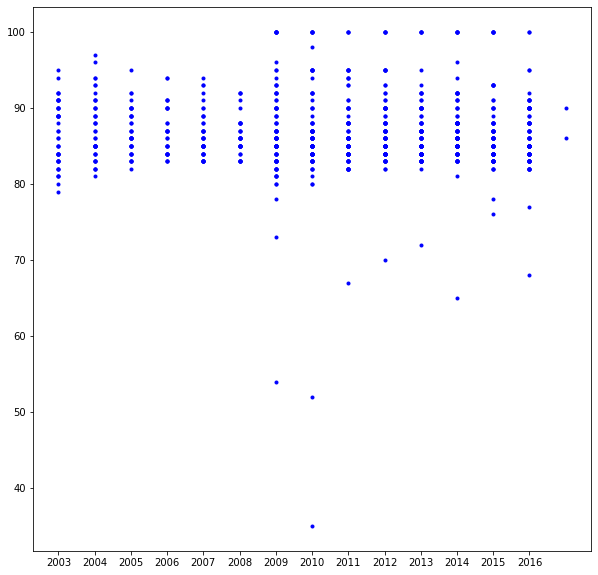

In [200]:
x = best_new_music['pub_year']
y = best_new_music['score']

plt.figure(figsize = (10, 10))
plt.plot(x, y, 'b.')
plt.xticks(np.arange(2003, 2017))

### Best Music Labels

In [201]:
raw_data['label'].value_counts()

self-released            420
drag city                269
sub pop                  266
thrill jockey            244
merge                    239
warp                     209
domino                   204
matador                  202
columbia                 199
mute                     159
warner bros.             154
astralwerks              149
jagjaguwar               145
interscope               137
secretly canadian        131
atlantic                 130
4ad                      123
kranky                   115
rough trade              113
capitol                  108
polyvinyl                107
virgin                   103
def jam                  102
xl                       101
temporary residence       97
relapse                   93
stones throw              91
anti-                     90
kill rock stars           90
ninja tune                89
                        ... 
strange lane               1
madrona                    1
trax                       1
fayettenam    

In [202]:
label_data = pd.DataFrame(columns = ['label name', 'total score', 'total albums', 'average score'])
label_data.head()

,label name,total score,total albums,average score


In [203]:
# Grab the label names first 
label_names = []
for i in raw_data['label'].index:
    name = raw_data.loc[i, 'label']
    
    if name in label_names:
        continue;
    else:
        label_names.append(name)

In [204]:
label_data['label name'] = label_names
label_data.head()

,label name,total score,total albums,average score
0,virgin,NaN,NaN,NaN
1,hathenter,NaN,NaN,NaN
2,static shock,NaN,NaN,NaN
3,kill rock stars,NaN,NaN,NaN
4,teklife,NaN,NaN,NaN


In [205]:
scores = []
total_albums = []
for i in label_data['label name']:
    temp_data = raw_data[raw_data['label'] == i]
    temp_score = temp_data['score'].sum()
    temp_album = len(temp_data)
    
    scores.append(temp_score)
    total_albums.append(temp_album)

In [206]:
label_data['total score'] = scores
label_data['total albums'] = total_albums
label_data['average score'] = label_data['total score'] / label_data['total albums']

label_data.head()

,label name,total score,total albums,average score
0,virgin,6617,103,64.242718
1,hathenter,79,1,79.000000
2,static shock,156,2,78.000000
3,kill rock stars,6321,90,70.233333
4,teklife,222,3,74.000000


##### Top 20 labels based on having at least 10 albums reviewed and average score


In [207]:
label_data[label_data['total albums'] >= 10]\
    .sort_values(by = 'average score', ascending = False)[:20]['label name']

108           dust-to-digital
1606             hip-o select
141                      stax
2366                   ~scape
2053    table of the elements
81                modern love
178     paradise of bachelors
1821                   tzadik
273                       mca
723           sincerely yours
166      what's your rupture?
15                  soul jazz
101        light in the attic
48               numero group
640                     touch
215                       ecm
44                     legacy
151              20 buck spin
227                    motown
386                 young god
Name: label name, dtype: object

### Create new dataframe: Find the total score, total albums, average score, genre of all artists

In [208]:
artist_data = pd.DataFrame(columns = ['artist', 'total score', 'albums count', 'genre', 'Average Score'])
artist_data

,artist,total score,albums count,genre,Average Score


In [209]:
for i in raw_data.index:
#     print(raw_data.loc[i, 'artist'])
    if raw_data.loc[i, 'artist'] in artist_data.values:
        artist_data.append(raw_data.loc[i, 'artist'])

massive attack
krallice
uranium club
kleenex, liliput
taso
various artists
little simz
yotam avni
brian eno
the lox
harry bertoia
run the jewels
steven warwick
yasiin bey
smoke dza, pete rock
various artists
senyawa
chance the rapper, jeremih
jamire williams
the-dream
worm ouroboros
nine inch nails
elder ones
the microphones
ben frost
kacey musgraves
jay som
rashad becker
ray charles
ab-soul
pantera
gucci mane
mica levi
kid cudi
sammus
hodgy
jeff parker
a-trak
jess williamson
kevin abstract
adr
deadmau5
jessy lanza
peter broderick
qasim naqvi
post malone
bob dylan
ricardo villalobos, umho
peder mannerfelt
j. cole
pink floyd
flume
gaye su akyol
jeff buckley
various artists
saba
various artists
simian mobile disco
gas
kodie shane
the orchestra of syrian musicians
blessed initiative
neil young
soundgarden
nick hook
kjartan sveinsson
the rolling stones
gucci mane, lil uzi vert
young male
alex izenberg
childish gambino
fetty wap
miranda lambert
denitia and sene
john legend
yoko ono, john le

whitney
big thief
melvins
moonface, siinai
payroll giovanni
slum village
steve gunn
the wailers
cough
joey purp
fifth harmony
dm-funk
seiho
flume
william tyler
die antwoord
jank
mark kozelek
holy fuck
sepalcure
angry angles
kevin gates
beth orton
minor victories
angel du$t
daniel romano
kristin kontrol
pup
olga bell
rebolledo
autechre
robert glasper, miles davis
classixx
africans with mainframes
the hotelier
the underachievers
allen ginsberg
debo band
wolf parade
islands
various artists
adult jazz
ariana grande
gold panda
steve reich
mock orange
david bowie
dawn richard
so so glos
terry allen
bob dylan
pantha du prince
rhys chatham
eagulls
christian naujoks
marissa nadler
richard ashcroft
adia victoria
carla bley
car seat headrest
post malone
head wound city
tim heidecker
various artists
mutual benefit
torn hawk
oscar
jessy lanza
nothing
a giant dog
shit robot
chance the rapper
summer cannibals
jameszoo
pinkshinyultrablast
miles davis
modern baseball
kvelertak
arbor labor union
hooded 

autre ne veut
girl band
nicole dollanganger
larry gus
run the jewels
battles
various artists
childbirth
moscow club
deafheaven
big grams
david bowie
jay rock
mercury rev
fetty wap
little simz
drew mcdowall
graveyard
doe paoro
the dead weather
peaches
wand
ron morelli
sarah kirkland snider
chvrches
casey veggies
the world is a beautiful place & i am no longer afraid to die
chevel
anderson .paak
disclosure
ryan adams
mariah
the underachievers
juicy j
young thug
t.i.
des ark
toro y moi
micachu and the shapes
drake, future
u.s. girls
fennesz, king midas sound
jawbox
destruction unit
kurt vile
new order
dungen
natasha kmeto
botany
lana del rey
the arcs
max richter
sam binga
donmonique
julia holter
various artists
alessia cara
the roadside graves
dit
youth lagoon
blackalicious
jens-uwe beyer
dope body
mary halvorson
travis scott
venetian snares
willis earl beal
corrina repp
merzbow, jim orourke, akira sakata, chikamorachi
ought
public image ltd
metric
pole
air waves
low
dj richard
rose mcdow

swervedriver
crypt sermon
og maco
will butler
dick diver
various artists
the black ryder
tom brosseau
various artists
radical dads
mastery
crookers
eartheater
of montreal
lady lamb the beekeeper
moon duo
sam prekop
rima kato
levon vincent
sannhet
thin lizzy
estelle
david borden
purity ring
noel gallagher's high flying birds
lead belly
eula
pile
chief keef
parquet courts
mndr, sweet valley
dutch uncles
an autumn for crippled children
future brown
hodgy
gang of four
pelican
the pop group
big sean
black twig pickers, steve gunn
theesatisfaction
tica douglas
steve earle & the dukes
led zeppelin
iron & wine
eternal tapestry
diet cig
colleen green
dan deacon
torche
screaming females
ibeyi
nadastrom
the king khan & bbq show
the juliana hatfield three
twin river
tropics
the wave pictures
phosphorescent
various artists
kate pierson
dj sotofett
pika
jos gonzlez
krill
felix k
carter tutti
grooms
drake
the staple singers
dan lissvik
axis: sova
damon & naomi
ghostface killah, badbadnotgood
the amaz

the proper ornaments
the skygreen leopards
various artists
viet cong
kasai allstars
fhloston paradigm
what moon things
nonono
brian eno, karl hyde
godflesh
various artists
the vacant lots
serpentine path
mark kozelek
beverly
luke abbott
ooioo
motion sickness of time travel
caustic window
plastikman
cabaret voltaire
eaters
dalhous
riff raff
circulatory system
mike cooper
trap them
old 97's
ab-soul
total control
craig leon
white reaper
ulises conti
mastodon
black bananas
alexis taylor
peter matthew bauer
eyehategod
a sunny day in glasgow
strand of oaks
m. geddes gengras
jobriath
harassor
how to dress well
lower
various artists
dan melchior und das menace
matteah baim
the knife
the soft pink truth
open mike eagle
willie nelson
dead congregation
lone
sam smith
richard reed parry
brian reitzell
nightfell
the antlers
mogwai
devont hynes
big freedia
alex g
white lung
boris
various artists
the felice brothers
donnie & joe emerson
lana del rey
mariah carey
klaxons
martyn
yaitw
death grips
julia

phill niblock
kevin morby
guido
perera elsewhere
thee oh sees
raum
shearwater
beachwood sparks
creep
milosh
mick turner
gap dream
teengirl fantasy
hellfyre club
destroyer
various artists
sebastien grainger
egyptrixx
jensen sportag
various artists
tindersticks
okkyung lee, c. spencer yeh, lasse marhaug
title fight
jhen aiko
the killers
russian circles
logos
ricardo donoso
willie burns
soundgarden
excepter
anna calvi
fins
vatican shadow
death grips
andrew bird
the stranger
minor alps
skeletonwitch
kurt vile, sore eros
various artists
magik markers
fis
future of the left
john talabot
throwing muses
wooden shjips
cate le bon
whores
the beatles
yamantaka // sonic titan
various artists
brad laner
boogarins
blood orange
various artists
polia
gatekeeper
skin town
songs: ohia
moonface
tennis
no joy
jonwayne
grizzly bear
mount eerie
luke temple
connan mockasin
musiccargo
swans
gesaffelstein
kronos quartet, bryce dessner
william onyeabor
luscious jackson
action bronson, party supplies
sbastien te

laurel halo
survival
shannon and the clams
secret circuit
daft punk
laura mvula
scout niblett
daniel menche
sqrl
various artists
mark lanegan & duke garwood
vr
cathedral
various artists
the fall
pharmakon
dungeonesse
slava
john grant
the breeders
bibio
love
gun outfit
sadgiqacea
wild nothing
r.e.m.
adult.
uncle acid and the deadbeats
patrick vian
vampire weekend
sam amidon
tera melos
various artists
the focus group
she & him
small black
pharaohs
immolation
purson
justice
kid cudi
beaches
zs
aosoth
primal scream
little boots
david lang
gobby
wolf people
chance the rapper
colin stetson
co la
bill ryder-jones
howl
savages
van dyke parks
neon neon
altar of plagues
omar s
deerhunter
so so glos
talib kweli
the body
wax idols
mikal cronin
melvins
ola podrida
various artists
connections
guided by voices
akron/family
various artists
bone sickness
sandwell district
!!!
the album leaf, sun kil moon
wiz khalifa & curren$y
hessian
pretty & nice
iggy and the stooges
at the drive-in
pan american
laur

the tallest man on earth
melvins
arthur russell, peter zummo
jaill
hot chip
metric
dent may
bullion
ursprung
azealia banks
burzum
captain beefheart
the young
smoke fairies
laurel halo
the hives
ryan monroe
cadence weapon
mystery jets
patti smith
curren$y
crocodiles
dntel
d'eon
beak>
ab-soul
pauline oliveros
teen daze
mina tindle
liars
gossip
oddisee
saint vitus
airbird
neil young, crazy horse
sun kil moon
the wake
david banner
aldebaran
health
marissa nadler
drexciya
the mynabirds
mike shiflet
sigur rs
public image ltd
regina spektor
edward sharpe & the magnetic zeros
tu fawning
japandroids
lemonade
scissor sisters
king tuff
plankton wat
the walkmen
future of the left
talwst
slugabed
jam city
paul mccartney, linda mccartney
mutilation rites
exitmusic
advance base
reptar
saint etienne
rye rye
spacin'
the trypes
hauschka, hilary hahn
mount eerie
andrew weatherall
grass widow
simian mobile disco
choir of young believers
el-p
dope body
baio
jimmy edgar
pinkish black
squarepusher
abba
meek 

steve mason, dennis bovell
carol kleyn
cult of youth
pulp
richard buckner
wiley
dave.i.d
connan mockasin
beirut
mark mcguire, trouble books
idaho
the advisory circle
is tropical
bonnie prince billy
efrim manuel menuck
lloyd
john tejada
alex clare
the decemberists
boston spaceships
human eye
autre ne veut
chiddy bang
jrgen mller
screaming trees
soft metals
comet gain
sorry bamba
moonface
wu-tang
cut hands
william elliott whitmore
elysian fields
archers of loaf
hudson mohawke
release the sunbird
nicholas szczepanik
grieves
mellowhype
motor city drum ensemble
grooms
ssion
viva brother
marvin gaye
philip selway
mike simonetti
baobinga and co.
ada
lil wayne
tiger & woods
army navy
molly sweeney
painted palms
how to dress well
little dragon
random axe
eternal tapestry, sun araw
sebastian
the horrors
nguzunguzu
la big vic
machinedrum
inc.
kendrick lamar
prurient
various artists
fruit tree foundation
serengeti
megadeth
gucci mane
borden, ferraro, godin, halo & lopatin
samiyam
sons and daughter

minks
imaginary softwoods
white fence
wire
modeselektor
the soft moon
various artists
bardo pond
atlas sound
british sea power
rick ross
various artists
kyle bobby dunn
the dismemberment plan
n.e.r.d.
prefuse 73/jaytram/epstein
ducktails
giant sand
yeasayer
tapes 'n tapes
gatekeeper
future islands
the beets
m.i.a.
r. kelly
scientist
the parting gifts
soft landing
gorillaz
jj
tensnake
cfcf
the phantom band
vampire weekend
jrgen paape
shara worden, sarah kirkland snider, signal
floored by four
eternal summers
the knife, planningtorock, mt. sims
ryan adams & the cardinals
wooden wand
callers
sheek louch
ghostface killah
shackleton
jason forrest
big troubles
solar bears
daft punk
wild nothing
t.i.
various artists
autre ne veut
off!
blank dogs
koen holtkamp
blood red shoes
residual echoes
spoon
nico muhly
tanlines
miko
d'eon
agalloch
horsepower productions
bjrn torske
purling hiss
dark dark dark
jnsi
the soft boys
british sea power
gospel music
soft circle
robyn
lazerbeak
reading rainbow
br

various artists
lifter puller
elbow
mulatu astatke
oh no
pink skull
neil young
various artists
luciano
ooioo
pyramids with nadja
felt
paul mccartney
julianna barwick
gusgus
princeton
rihanna
dm-funk
rakim
jookabox
early day miners
kraftwerk
blakroc
lackthereof
edan
charlotte hatherley
jay farrar & benjamin gibbard
the bravery
jahdan blakkamoore
pelican
mount kimbie
animal collective
frank sinatra
clare and the reasons
think about life
the happy hollows
jawbox
holopaw
gift of gab
d. charles speer and the helix
gary higgins
tom waits
various artists
glass ghost
various artists
lake heartbeat
rjd2
the doors
snow patrol
grant hart
get back guinozzi!
them crooked vultures
hall and oates
roll deep
franklin bruno
christmas island
annie
bibio
orenda fink
hush arbors
vijay iyer trio
real estate
david bowie
kid sister
talk normal
cfcf
lil wayne
guided by voices
50 cent
the cribs
little dragon
yeah yeah yeahs
the rolling stones
vitalic
brakes
king midas sound
god help the girl
joe goddard
dj /rup

cam'ron
company flow
ekkehard ehlers, paul wirkus
harlem
seeland
isis
bloc party
pontiak
dananananaykroyd
casper & the cookies
maximo park
a hawk and a hacksaw
dd/mm/yyyy
nadja
patrick watson
mark kozelek
steve earle
hanne hukkelberg
meanderthals
chain and the gang
de la soul
casiotone for the painfully alone
mika miko
el michels affair
the phantom band
arctic monkeys
fischerspooner
richard swift
kingsbury manx
deradoorian
akron/family
magik markers
the horrors
odd nosdam
woebot
nick cave & the bad seeds
the veils
peaches
tara jane o'neil
the shortwave set
st. vincent
the vaselines
wildbirds & peacedrums
rodriguez
harlem shakes
conor oberst and the mystic valley band
nomo
thee oh sees
pink mountaintops
double dagger
my morning jacket
comet gain
ariel pink's haunted graffiti
bardo pond
great northern
bob dylan
arthur russell
various artists
the life and times
crocodiles
the breeders
tinted windows
kid606
a camp
ape school
jane's addiction
brakes
throw me the statue
thunderheist
bike for

deerhoof
crooked fingers
juana molina
castanets
these united states
marnie stern
annuals
rafter
yo majesty
volcano!
antony and the johnsons
lambchop
sic alps
the rosebuds
liz durrett
department of eagles
the pretenders
ancestors
the spinto band
stereophonics
the streets
miles davis
hawnay troof
intronaut
noah and the whale
vivian girls
the week that was
ice cube
31knots
the dead science
t.i.
saint etienne
teenage jesus and beirut slump
the lovely sparrows
golden smog
the jesus and mary chain
murs
leila
land of talk
various artists
mercury rev
unkle
madlib
krisiun
apollo sunshine
u2
dungen
horse feathers
bill dixon
dj khaled
the replacements
serena-maneesh
growing
lia ices
totimoshi
monkey
gentleman jesse & his men
david holmes
angela desveaux
talkdemonic
jenny lewis
high places
koushik
juliana hatfield
morton feldman
mogwai
cold war kids
the final solution
all girl summer fun band
the red krayola
tv on the radio
brightblack morning light
sam champion
suarasama
music go music
yo la teng

drive-by truckers
aloha
c.c.c.c.
zs
mother and the addicts
love is all
buzzcocks
samara lubelski
zillionaire
rob sonic
black mountain
hello, blue roses
various artists
fatal flying guilloteens
witchcraft
lisa germano
times new viking
gram parsons
various artists
manchester orchestra
cat power
blood on the wall
double dagger
pre
lisa gerrard
boscoe
andrew bird
various artists
various artists
odd nosdam
lil wayne
excepter
various artists
the cansecos
bc camplight
the field
various artists
octoberman
mass shivers
blue states
eels
school of language
michael hurley
hi-tek
the a-sides
the magnetic fields
slow six
atmosphere
the intelligence
ham1
jhann jhannsson
various artists
pedro
turin brakes
dj drama
various artists
the honeydrips
idlewild
carolyn mark
the black ghosts
high on fire
michael showalter
white denim
karate
marla hansen
lupe fiasco
annuals
styles p
jazkamer
spokane
rufus wainwright
various artists
trae
club 8
prints
the simpsons
british sea power
sole and the skyrider band
ari

neil young
various artists
catherine howe
rio en medio
willy mason
beck
the fall
fucked up
winterkids
tempo no tempo
rjd2
nico
cheeseburger
the one am radio
chris garneau
sun kil moon
patrick wolf
dlek
the frames
omar rodriguez-lpez & damo suzuki
air
marissa nadler
dean & britta
the view
rwake
bright eyes
au revoir simone
big business
greg ashley
money mark
arcade fire
amon tobin
charlotte hatherley
damero
barr
!!!
the zombies
the eternals
tanakh
the diminisher
kaiser chiefs
aesop rock
electric light orchestra
mittens on strings
love of diagrams
johnny cash
gui boratto
uncut
trans am
yellow swans & birchville cat motel
the early years
luscious jackson
ignatz
m. ward
black lips
various artists
the capstan shafts
do make say think
lavender diamond
white flight
marnie stern
madonna
thomas brinkmann
benevento/russo duo
l. pierre
papercuts
eluvium
richard swift
dredd foole
gotye
boredoms
shining
the high llamas
elephant man
p.g. six
charlie louvin
the besnard lakes
the la's
david karsten da

ris paul ric
various artists
keith fullerton whitman
magneta lane
stereolab
graham coxon
chihei hatakeyama
magik markers
magnet
neko case
i love you but i've chosen darkness
james blackshaw
living things
the society of rockets
pansy division
mogwai
mudhoney
wooden wand and the vanishing voice
kelley stoltz
matisyahu
various artists
stone jack jones
why?
souls she said
belle and sebastian
diskaholics anonymous trio
catfish haven
questlove
new radiant storm king
mclusky
various artists
curt kirkwood
hank
electric president
merle haggard
tapes 'n tapes
make-up
raising the fawn
philip samartzis
eels
mastodon
tape
the ladies
the national trust
battles
sunset rubdown
bob marley & the wailers
world leader pretend
oceansize
liars
lilys
eliot lipp
the m's
the kooks
nick cave and warren ellis
kieran hebden
nathan fake
measles mumps rubella
ayatollah
destroyer
maximo park
various artists
alog
heros severum
town and country
capitol k
hudson bell
controller.controller
isole
man man
aids wolf
variou

rod lee
yann tiersen & shannon wright
mice parade
electric six
various artists
wilderness
the old haunts
om
hair police
joy zipper
various artists
eyeball skeleton
various artists
the narrator
goon moon
clap your hands say yeah
black sunday
orthrelm
pajo
22-20s
need new body
major stars
the velvet underground
turin brakes
say hi to your mom
isis
billy corgan
the tears
applied communications
screaming trees
saint etienne
laura cantrell
engineers
ellen allien
the orange peels
foo fighters
m.e.d.
red sparowes
the secret machines
the dead 60s
isole
t.o.k.
nomo
bear vs. shark
thrones
brian eno
the oranges band
jason forrest
despistado
lali puna
the fall
islaja
mathematics
mugison
pernice brothers
dj shadow
the dirtbombs
spoonie gee
team sleep
tullycraft
richard thompson
smog
chris cutler
young gunz
cex
kraftwerk
kirsty maccoll
the duke spirit
nobody
early man
make believe
super furry animals
coldplay
various artists
lucero
the white stripes
keith fullerton whitman
p:ano
a northern chorus
me

mf doom
rufus wainwright
bibio
the residents
gravenhurst
high water marks
michael jackson
wu-tang clan
electric company
prosaics
eminem
nick drake
hall of fame
smoke and smoke
smith & mighty
can
various artists
tanakh
metal fingers
lusine
john lennon
liz janes
sleepytime gorilla museum
the nels cline singers
at the drive-in
cat power
various artists
isis
akufen
tarentel
the firebird band
annie
explosions in the sky
mellow
willie nelson
flat earth society
neko case
depeche mode
pattern is movement
non, boyd rice
vordul mega
leonard cohen
various artists
the soft pink truth
the graves
jake fairley
j.u.f.
the donnas
cex, kid606
sunburned hand of the man
mugison
grandaddy
el-p
wilco
kid dakota
shivaree
various artists
death from above 1979
aloha
frausdots
iqu
matt sharp
jay z, r. kelly
dj /rupture
the court & spark
mcenroe and birdapres
the go! team
beans
sir richard bishop
julie doiron
black eyes
pavement
ariel pink's haunted graffiti
edith frost
les georges leningrad
son ambulance
boredo

claro intelecto
fancey
mirah
ill bill
united state of electronica
to rococo rot
50footwave
quantic
macha
faust, dlek
petracovich
s prcss
icarus line
the skygreen leopards
patterson hood
the places
erlend ye
surferosa
the beta band
decahedron
bobbie gentry
ghostface
frost
schneider tm
vast aire
tom recchion
dj zeph
melt-banana
jolie holland
finishing school
josh roseman
animal collective
on the speakers
rockfour
various artists
loretta lynn
french kicks
deathprod
azita
born heller
sunburned hand of the man
friends of dean martinez
foreign legion
prince
patrick wolf
p.g. six
ratatat
various artists
the real tuesday weld
the locust
boards of canada
john chantler
superpitcher
gaji
world standard, wechsel garland
fembots
eagles of death metal
seachange
lali puna
noxagt
craig taborn
les savy fav
shuggie otis
currituck co.
bigger lovers
onelinedrawing
angel molina
the double
vera cruise
dj signify
architecture in helsinki
mochipet
keith fullerton whitman
old time relijun
broken family band
th

sentridoh
el guapo
common
sonic youth
phill niblock
the byrds
chromatics
jr ewing
prince paul
manitoba
whirlwind heat
m83
tes
new wet kojak
iran
the jayhawks
goldfrapp
various artists
monade
styrofoam
yoshimi & yuka
prefuse 73
the sea and cake
hot cross
youngblood brass band
pole
howe gelb
birddog
wire
the new pornographers
atom and his package
via tania
blur
arab on radar
rjd2
stratford 4
four tet
john fahey
pest
d+
stereolab
velvet crush
tomahawk
of montreal
saboten
various artists
panthers
the flaming lips
sonic youth
sahara hotnights
grand mal
damien jurado
murder city devils
mushroom, gary floyd
set fire to flames
juggaknots
yeah yeah yeahs
the faint
richard youngs
portastatic
greg weeks
wilco
immortal lee county killers
mouse on mars
the essex green
uncle tupelo
meanest man contest
sunburned hand of the man
d4
murs
hanin elias
autechre
twin atlas
the black keys
lenola
el-p
saturday looks good to me
tim hecker
magas
ben harper
buzzcocks
jaga jazzist
placebo
barbara morgenstern
gra

mong hang
the extra lens
mr. lif
the national trust
pere ubu
speedy j
various artists
david sylvian
shiner
moth
derek bailey
danielson famile
various artists
sonic youth
mirza
the mars volta
farben
imperial teen
nagisa ni te
shannon wright
guided by voices
catheters
cranes
shelleydevoto
six parts seven
loren connors
the secret machines
mayday
black dog and black sifichi
the lucksmiths
departure lounge
global home project
el-p
various artists
bob drake
panthers
mri
old time relijun
jello biafra
mull historical society
david bowie
the other people place
selby tigers
the herbaliser
silkworm
tami hart
kid606
liars academy
ash
jim black
beachwood sparks
central falls
the ghost
microwaves
the get up kids
thursday
bill frisell
hrsta
enon
charles atlas
pullman
doves
fly pan am
ruins
dj shadow
the roots of orchis
le tigre
brute
pixeltan
mark eitzel
xiu xiu
ativin
eminem
solex
buffalo daughter
geoff farina
the velvet teen
sean na na
daedelus
jeff tweedy
gary wilson
medeski, martin and wood
the b

superdrag
jega
waco brothers
lambchop
merle haggard
various artists
creeper lagoon
therapy?
blonde redhead
red stars theory
the minders
nightmares on wax
don caballero
radiohead
the black heart procession
badly drawn boy
swayzak
bonnie prince billy, marquis de tren
morcheeba
johnny cash
the sea and cake
matthew sweet
90 day men
meat puppets
tristeza
pinback
the go-betweens
damien jurado
goldfrapp
carl craig
pluramon
damon & naomi
laura cantrell
pram
sixteen horsepower
sarah cracknell
the softies
underworld
susumu yokota
trans am
eleventh dream day
bettie serveert
the 6ths
ryan adams
the helio sequence
pinetop seven
groove armada
man or astro-man?
rian murphy and will oldham
joan of arc
guided by voices
bjrk
the microphones
ladytron
the wisdom of harry
a guy called gerald
mogwai
thievery corporation
spring heel jack
duster
chris knox
buffalo tom
starlight mints
iqu
the posies
the beach boys
mansun
portastatic
toe
various artists
cave in
shellac
animal collective
bablicon
steve earle
des

In [210]:
# Grab the artist names first 
artist_names = []
for i in raw_data['artist'].index:
    name = raw_data.loc[i, 'artist']
    
    if name in artist_names:
        continue;
    else:
        artist_names.append(name)

In [211]:
artist_data['artist'] = artist_names
artist_data.head()

,artist,total score,albums count,genre,Average Score
0,massive attack,NaN,NaN,NaN,NaN
1,krallice,NaN,NaN,NaN,NaN
2,uranium club,NaN,NaN,NaN,NaN
3,"kleenex, liliput",NaN,NaN,NaN,NaN
4,taso,NaN,NaN,NaN,NaN


In [212]:
artist_data.drop(2731, inplace = True)

In [213]:
scores = []
total_albums = []
genres = []
for i in artist_data['artist']:
    temp_data = raw_data[raw_data['artist'] == i]
    temp_score = temp_data['score'].sum()
    temp_album = len(temp_data)
    temp_genre = (temp_data['genre']).value_counts().index[0]
    
    scores.append(temp_score)
    total_albums.append(temp_album)
    genres.append(temp_genre)

In [214]:
artist_data['total score'] = scores
artist_data['albums count'] = total_albums
artist_data['genre'] = genres

In [215]:
# Get the average score for each artist
artist_data['Average Score'] = artist_data['total score'] / artist_data['albums count']
artist_data.head()

,artist,total score,albums count,genre,Average Score
0,massive attack,510,8,electronic,63.75
1,krallice,560,7,metal,80.00
2,uranium club,73,1,rock,73.00
3,"kleenex, liliput",90,1,rock,90.00
4,taso,81,1,electronic,81.00


### Score differences between genres

array([[<matplotlib.axes._subplots.AxesSubplot object at 0x0000015C70207EF0>,
      dtype=object)

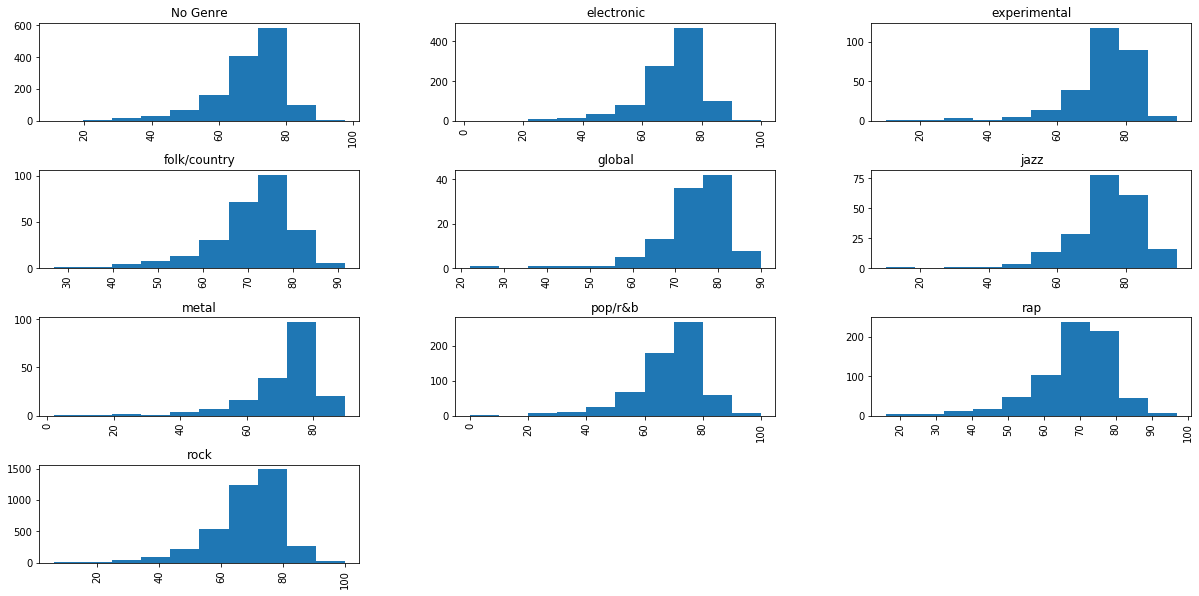

In [216]:
artist_data.hist('Average Score', 'genre', figsize = (20, 10), bins = 10)

### Top 50 Best & Worst reviewed artists based on average score

In [217]:
best_artists = artist_data.sort_values(by = 'Average Score', ascending = False)[:50]

<BarContainer object of 50 artists>

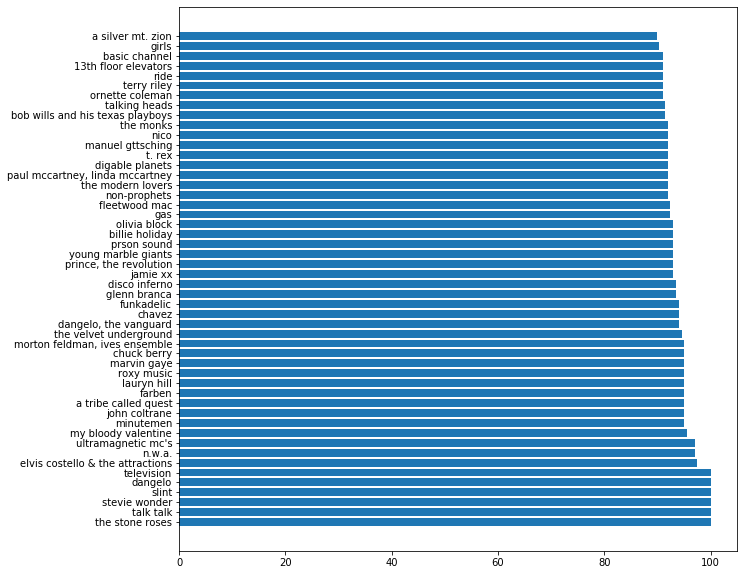

In [218]:
plt.figure(figsize=(10,10))
plt.barh(best_artists['artist'], best_artists['Average Score'])

In [219]:
worst_artists = artist_data.sort_values(by = 'Average Score', ascending = True)[:50]

<BarContainer object of 50 artists>

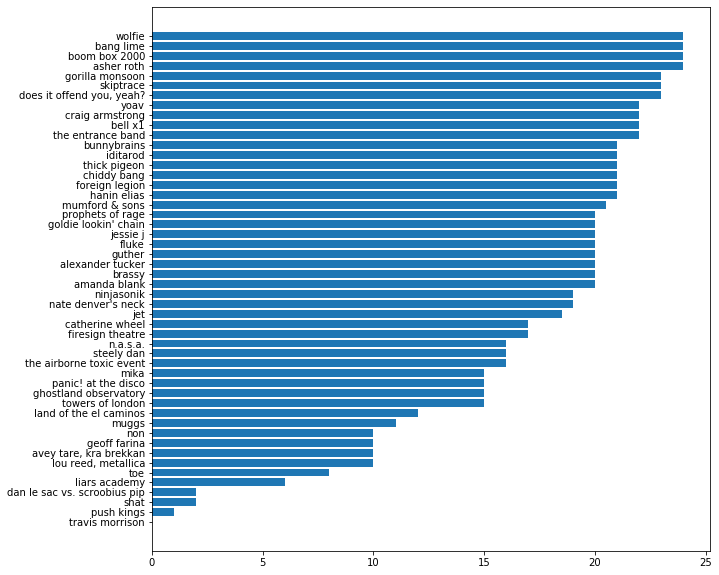

In [220]:
plt.figure(figsize=(10,10))
plt.barh(worst_artists['artist'], worst_artists['Average Score'])